Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **20. listopada 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [30]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\Users\Ivor\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['degrees', 'f', 'e', 'axes', 'size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [31]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

# N = 4 - broj primjera, n = 1 - dimenzija vektora značajki

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [32]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures(1. degree=2, *, 2. interaction_only=False, 3. include_bias=True, 4. order='C')
# 1. degree - int or tuple (min_degree, max_degree), default=2
# 2. interaction_only - bool, default=False 
#   i.e. included: x[0], x[1], x[0] * x[1], etc.
#        excluded: x[0] ** 2, x[0] ** 2 * x[1], etc.
# 3. include_bias - bool, default=True - If True (default), then include a bias column, the feature in which all polynomial powers are zero
# 4. order - {‘C’, ‘F’}, default=’C’ - Order of output array in the dense case. 'F' order is faster to compute, but may slow down subsequent estimators.

#                 [1, 0]
# design_matrix = [1, 1]
#                 [1, 2]
#                 [1, 4]

# design_matrix = np.hstack([np.ones(4).reshape(4,1), X])
design_matrix = PolynomialFeatures(1).fit_transform(X)
design_matrix

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [33]:
from numpy import linalg

w = linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T @ y
w_pseudoinv = linalg.pinv(design_matrix) @ y
w, w_pseudoinv

(array([2.2       , 0.45714286]), array([2.2       , 0.45714286]))

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Predictions = [2.2        2.65714286 3.11428571 4.02857143]
Labels = [4 1 2 5]
Error_nofunc = 4.085714285714286
Error = 2.042857142857143


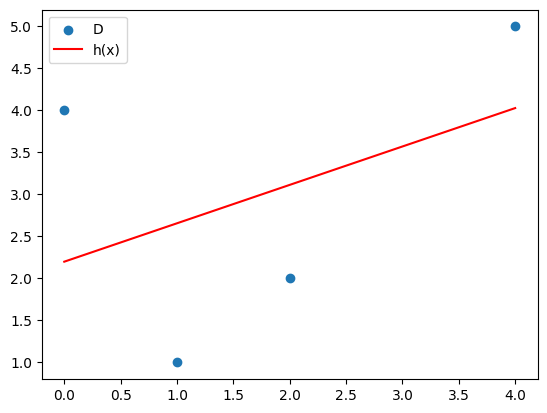

In [34]:
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared='deprecated')[source]

# y_true - array-like of shape (n_samples,) or (n_samples, n_outputs), Ground truth (correct) target values.
# y_predarray - like of shape (n_samples,) or (n_samples, n_outputs), Estimated target values.

h = design_matrix @ w
print("Predictions = " + str(h))
print("Labels = " + str(y))

e_nofunc = ((h - y).T @ (h - y)) / 2
print("Error_nofunc = " + str(e_nofunc))

e = mean_squared_error(y,h)
print("Error = " + str(e))

plt.scatter(X, y, label = "D")
plt.plot(X, h, label = "h(x)", c = 'red')
plt.legend()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
Weights = [ 4.         -5.91666667  3.375      -0.45833333]
Labels = [4 1 2 5]
Predictions = [4. 1. 2. 5.]
Error = 0


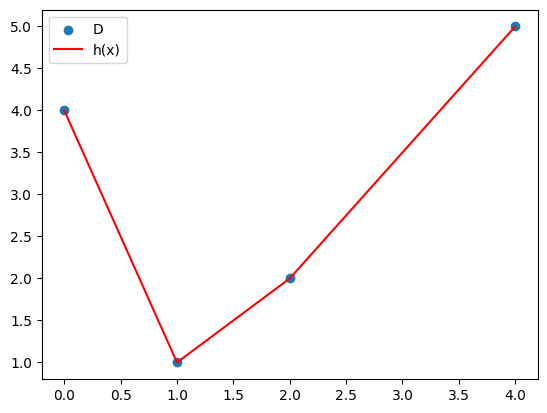

In [35]:
design_matrix_2 = PolynomialFeatures(3).fit_transform(X)
print(str(design_matrix_2))

w_2 = linalg.inv(design_matrix_2) @ y
print("Weights = " + str(w_2))

h_2 = design_matrix_2 @ w_2
print("Labels = " + str(y))
print("Predictions = " + str(h_2))

e_2 = mean_squared_error(y,h_2)
print("Error = " + ("0" if np.isclose(e_2, 0, atol = 1e-12) else str(e_2)))

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [36]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
print("Weights = [" + str(reg.intercept_) + " " + str(reg.coef_)[1:])
predictions = reg.predict(X)
print("Labels = " + str(y))
print("Predictions = " + str(predictions))
print("Error = " + str(mean_squared_error(y, predictions)))

Weights = [2.2 0.45714286]
Labels = [4 1 2 5]
Predictions = [2.2        2.65714286 3.11428571 4.02857143]
Error = 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [37]:
from numpy.random import normal, uniform

# random.normal(loc=0.0, scale=1.0, size=None)
#   loc - float or array_like of floats, Mean (“centre”) of the distribution.
#   scale - float or array_like of floats, Standard deviation (spread or “width”) of the distribution. Must be non-negative.
#   size - int or tuple of ints, optional, Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn.
# Returns: out - ndarray or scalar, Drawn samples from the parameterized normal distribution.


def make_labels(X, f, noise=0):
    labels = []
    N = normal(0, noise, 50)

    for j in range(0, len(X)):
        label = 0
        for i in range(0, len(f)):
            label += f[i] * (X[j] ** i) 
        label += N[j]
        labels.append(label)

    return labels


In [38]:
def make_instances(x1, x2, N) :
    output = np.array([np.array([x]) for x in np.linspace(x1,x2,N)])
    return output

In [39]:
f = [5, 1, -2, -5]
X = make_instances(-5,5,50)
labels = make_labels(X, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

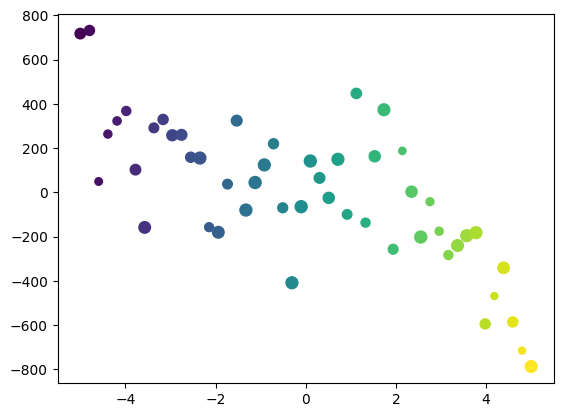

In [40]:
# matplotlib.pyplot.scatter(x, y, s=None,...)
#   x, y - float or array-like, shape (n, ), The data positions.
#   s - float or array-like, shape (n, ), optional
#   c - array-like or list of color or color, optional
#           Possible values:
#               - A scalar or sequence of n numbers to be mapped to colors using cmap and norm.
#               - A 2D array in which the rows are RGB or RGBA.
#               - A sequence of colors of length n.
#               - A single color format string.

plt.scatter(X, labels,  s = [(np.cos(np.random.normal(0, np.pi/2, len(X))) + 2) * 25], c = [(np.linspace(0, 1, len(X))) ** 1/2])

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Error = 31992.873268140498


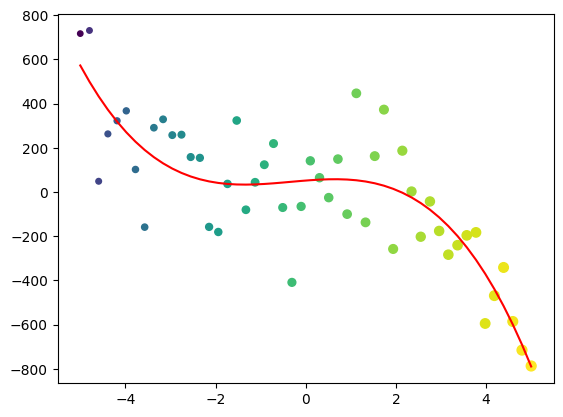

In [41]:
poly_features = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(poly_features, labels)

y_predicted = poly_model.predict(poly_features)

plt.scatter(X, labels, s = [np.linspace(15, 50, len(X))], c = [(np.linspace(0, 1, len(X))) ** (1/2)])
plt.plot(X, y_predicted, 'red')

print("Error = " + str(mean_squared_error(labels, y_predicted)))

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Error(1) = 49338.362706183616
Error(3) = 31992.873268140498
Error(5) = 31972.50064470283
Error(10) = 28517.604252420795
Error(20) = 19438.39966042291


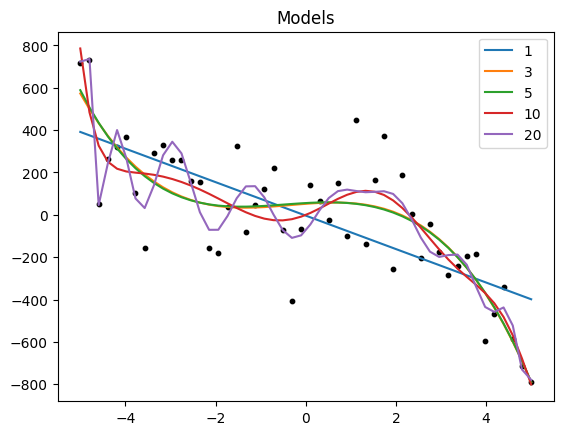

In [42]:
plt.scatter(X, labels, s = 10, c = 'black')
plt.title("Models")
model = LinearRegression()
degrees = [1, 3, 5, 10, 20]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X)
    model.fit(poly_features, labels)
    prediction = model.predict(poly_features)
    plt.plot(X, prediction, label = str(degree))
    print("Error(" + str(degree) + ") = " + str(mean_squared_error(labels, prediction)))

plt.legend(loc = "best")    


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

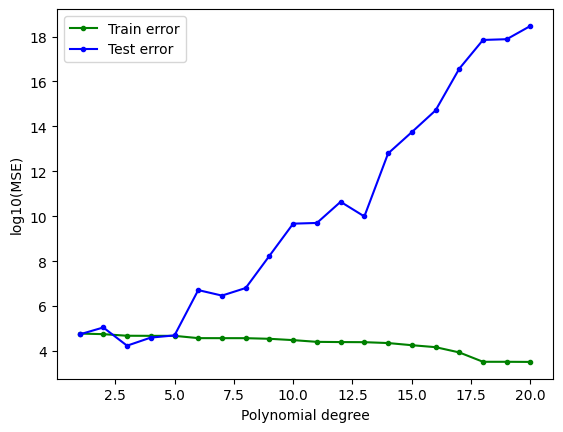

In [43]:
from sklearn.model_selection import train_test_split

#   sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

#       *arrays - sequence of indexables with same length / shape[0]
#       test_size - float or int,  If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
#                                  If int, represents the absolute number of test samples. 
#                                  If None, the value is set to the complement of the train size. 
#                                  If train_size is also None, it will be set to 0.25.
#
#       train_size - float or int, -||-
#
#       random_state - int, RandomState instance or None, Controls the shuffling applied to the data before applying the split. 
#                                                         Pass an int for reproducible output across multiple function calls.
#
#       shuffle - bool, Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
#       stratify - array-like, If not None, data is split in a stratified fashion, using this as the class labels.
#
##  Returns: splittinglist, length=2 * len(arrays), List containing train-test split of inputs.

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=None)

train_errors = []
test_errors = []

d = np.arange(1, 21, 1)

for i in d:
    poly_features = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X_train)
    model.fit(poly_features, y_train)
    prediction_train = model.predict(poly_features)
    prediction_test  = model.predict(PolynomialFeatures(degree=i, include_bias=False).fit_transform(X_test))
    train_errors.append(np.log10(mean_squared_error(y_train, prediction_train)))
    test_errors.append(np.log10(mean_squared_error(y_test, prediction_test)))

plt.xlabel("Polynomial degree")
plt.ylabel("log10(MSE)")
plt.plot(d, train_errors, 'g.-', label = "Train error")
plt.plot(d, test_errors,  'b.-', label = "Test error")
plt.legend(loc = 'best')


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

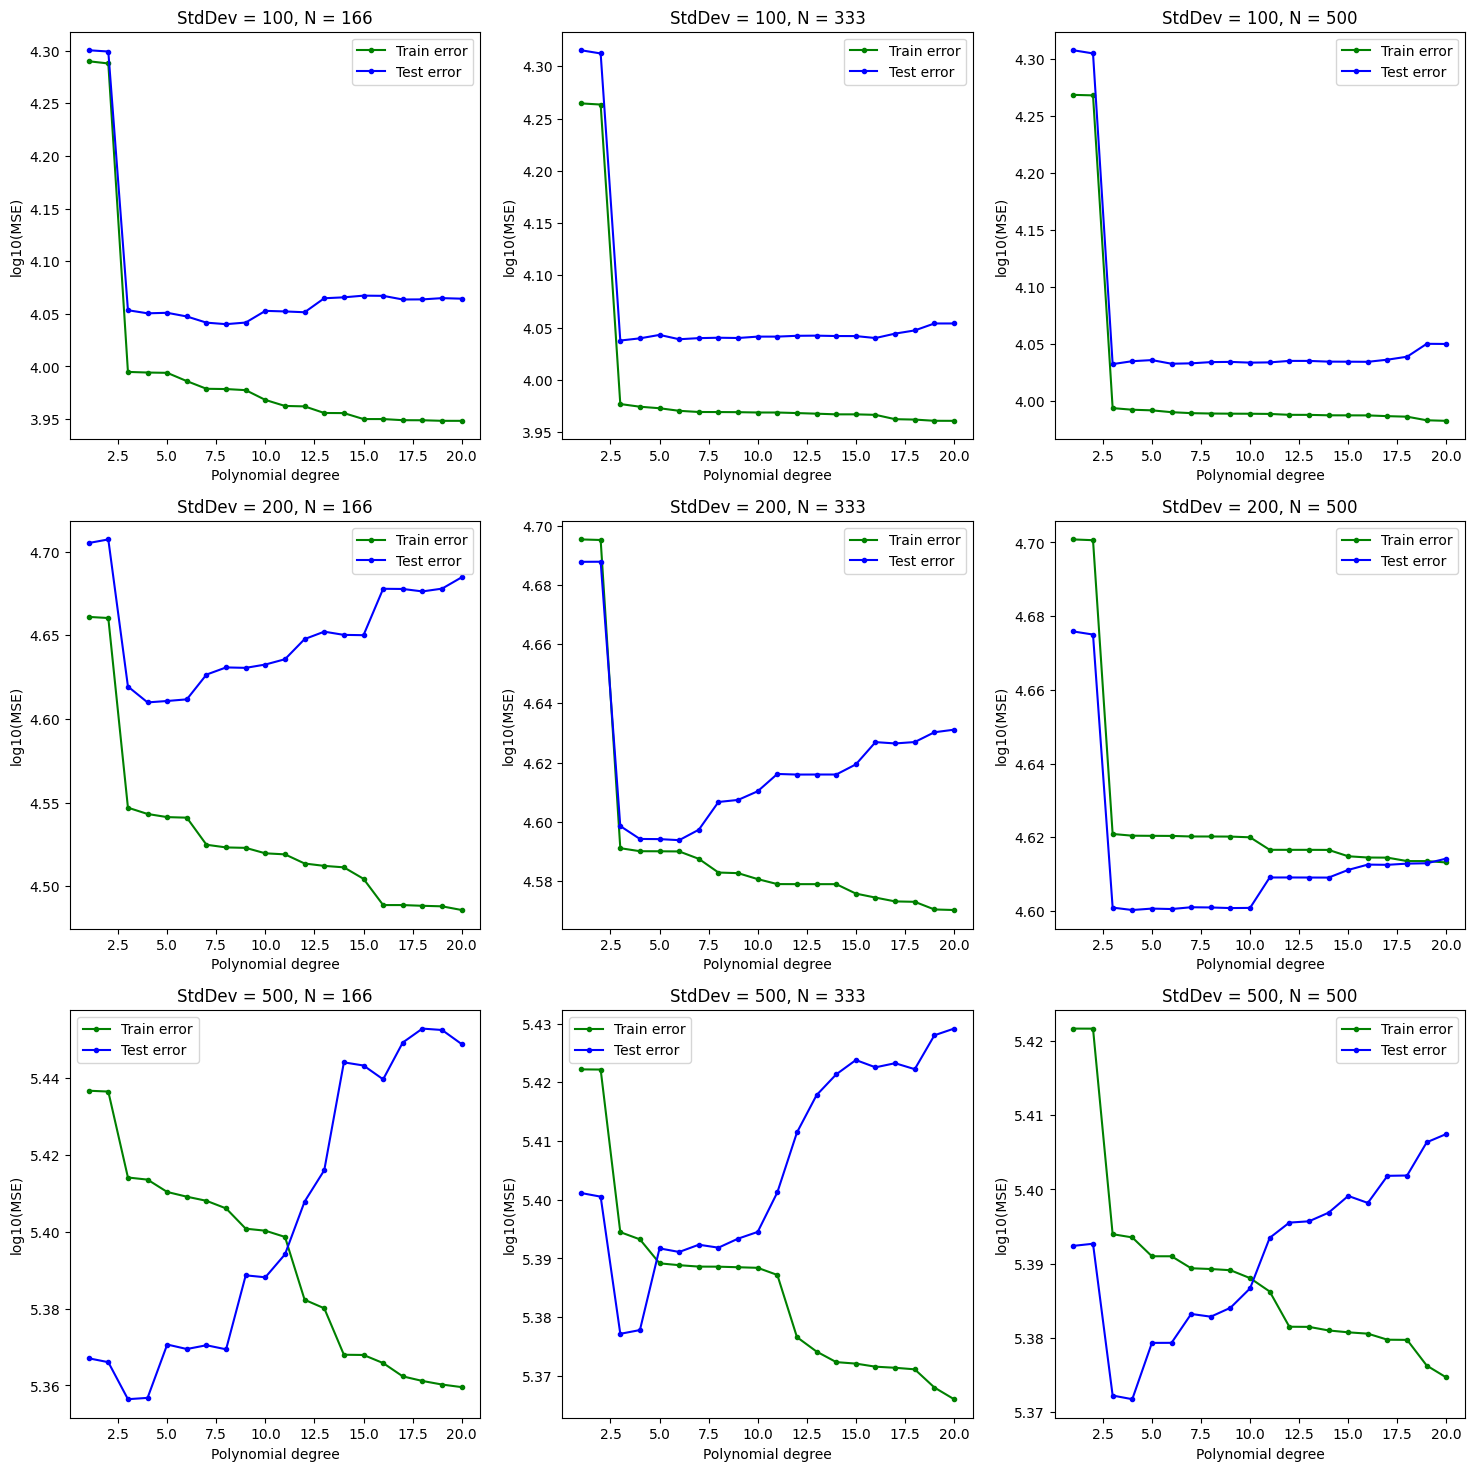

In [44]:
dataset_sizes = [1/3, 2/3, 1]
standard_deviations = [100, 200, 500]

# Generirajte najprije svih 1000 primjera,
X_1000 = make_instances(-5,5,1000)
labels_1000 = []

for j in range(0, len(X_1000)):
        label = 0
        for i in range(0, len(f)):
            label += f[i] * (X_1000[j] ** i) 
        labels_1000.append(label)

# podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera).
X_train_half, X_test_half, y_train_half, y_test_half = train_test_split(X_1000, labels_1000, test_size=0.5, random_state=None)


# Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka).           
# Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke.
# Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.
fig, axes = plt.subplots(3, 3, figsize = (18, 18))
for i in range(0, len(standard_deviations)):
    y_train_set = [y_train_half[idx] + normal(0, standard_deviations[i]) for idx in range(len(y_train_half))]
    y_test_set = [y_test_half[idx] + normal(0, standard_deviations[i]) for idx in range(len(y_test_half))]

    for j in range(0, len(dataset_sizes)):
         train_errors = []
         test_errors = []

         size = int(dataset_sizes[j] * 500)
         X_train = X_train_half[:size]
         X_test = X_test_half[:size]
         y_train = y_train_set[:size]
         y_test = y_test_set[:size]

         for k in d:
            poly_features = PolynomialFeatures(degree=k, include_bias=False).fit_transform(X_train)
            model.fit(poly_features, y_train)
            prediction_train = model.predict(poly_features)
            prediction_test  = model.predict(PolynomialFeatures(degree=k, include_bias=False).fit_transform(X_test))
            train_errors.append(np.log10(mean_squared_error(y_train, prediction_train)))
            test_errors.append(np.log10(mean_squared_error(y_test, prediction_test)))

         axes[i , j].set_title(f"StdDev = {standard_deviations[i]}, N = {size}")
         axes[i , j].set_xlabel("Polynomial degree")
         axes[i , j].set_ylabel("log10(MSE)")
         axes[i , j].plot(d, train_errors, 'g.-', label="Train error")
         axes[i , j].plot(d, test_errors, 'b.-', label="Test error")
         axes[i , j].legend(loc='best')

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [45]:
l = [0 , 1, 10]
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
design_matrix = PolynomialFeatures(3).fit_transform(X)
for i in range(0, len(l)):
    w = linalg.inv(design_matrix.T @ design_matrix + l[i] * (np.identity(4) - np.array([[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]))) @ design_matrix.T @ y
    print(f"w(l = {l[i]}) = {w}")

w(l = 0) = [ 4.         -5.91666667  3.375      -0.45833333]
w(l = 1) = [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
w(l = 10) = [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [46]:
from sklearn.linear_model import Ridge
# class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)
#   alpha - float, ndarray of shape (n_targets,), Constant that multiplies the L2 term, controlling regularization strength.

for i in range(0, len(l)):
    ridge = Ridge(l[i])
    poly_features = PolynomialFeatures(3, include_bias=False).fit_transform(X)
    ridge.fit(poly_features, y)
    print(f"w(l = {l[i]}) = [{ridge.intercept_} {str((ridge.coef_))[1:]}")

w(l = 0) = [3.999999999999986 -5.91666667  3.375      -0.45833333]
w(l = 1) = [3.0569614512471652 -0.69079365 -0.2831746   0.1445805 ]
w(l = 10) = [2.494441843122973 -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

Weights(Degree = 2, Lambda = 0) = [7.97899797 -82.36703614  -0.25727324]
Weights(Degree = 10, Lambda = 0) = [-62.99715797 -5.30690070e+01  1.22112935e+02  1.00185188e+01 -3.94414944e+01
 -1.42906853e+00  4.45346480e+00  6.24100438e-02 -2.01444343e-01
 -1.10125054e-03  3.13822586e-03]
Weights(Degree = 2, Lambda = 100) = [7.90714431 -66.93305996  -0.24898894]
Weights(Degree = 10, Lambda = 100) = [10.86163194 -4.92210527e+00  4.50498408e+00 -5.91384200e+00 -5.85741892e+00
  3.16766590e-01  9.36642888e-01 -1.54271778e-02 -4.76273549e-02
  1.16651368e-04  7.53883261e-04]


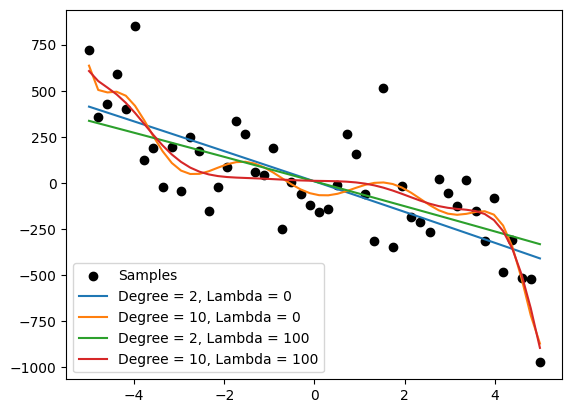

In [47]:
l = np.array([0, 100])
d = np.array([2, 10])
f = [5, 1, -2, -5]
X = make_instances(-5,5,50)
labels = make_labels(X, f, 200)

plt.scatter(X, labels, c = 'black', label = "Samples")
for lbd in l:
    ridge = Ridge(lbd)
    for degree in d:
        poly_features = PolynomialFeatures(degree, include_bias=False).fit_transform(X)
        ridge.fit(poly_features, labels)
        prediction = ridge.predict(poly_features)
        print(f"Weights(Degree = {degree}, Lambda = {lbd}) = {str(ridge.intercept_)[:len(str(ridge.intercept_)) - 1]} {str(ridge.coef_.ravel())[1:]}")
        plt.plot(X, prediction, label = f"Degree = {degree}, Lambda = {lbd}")
plt.legend()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


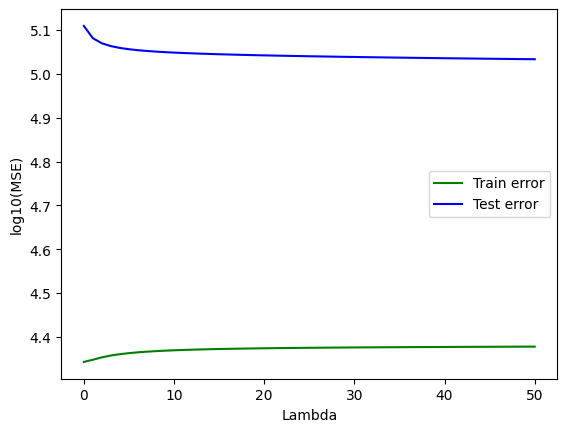

In [48]:
l = np.arange(0, 51, 1)
f = [5, 1, -2, -5]
X = make_instances(-5,5,50)
labels = make_labels(X, f, 200)

x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=None)
train_errors = []
test_errors = []
for i in l:
    ridge = Ridge(i)
    poly_features = PolynomialFeatures(degree=10, include_bias=False).fit_transform(x_train)
    ridge.fit(poly_features, y_train)
    prediction_train = ridge.predict(poly_features)
    prediction_test  = ridge.predict(PolynomialFeatures(degree=10, include_bias=False).fit_transform(x_test))
    train_errors.append(np.log10(mean_squared_error(y_train, prediction_train)))
    test_errors.append(np.log10(mean_squared_error(y_test, prediction_test)))
plt.xlabel("Lambda")
plt.ylabel("log10(MSE)")
plt.plot(l, train_errors, 'g', label = "Train error")
plt.plot(l, test_errors,  'b', label = "Test error")
plt.legend(loc = 'best')

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [49]:
def l0norm(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

def l1norm(coef):
    return np.sum(np.absolute(coef))

def l2norm(coef):
    return np.sqrt(np.sum(coef ** 2))

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

W(l = 1) =  [ 68.13202176 -18.52365319 -18.13652949   0.51603046   0.47066968]
W(l = 100) =  [ 4.84524542 -8.12424245 -8.28870354 -0.01534563  0.13828095]


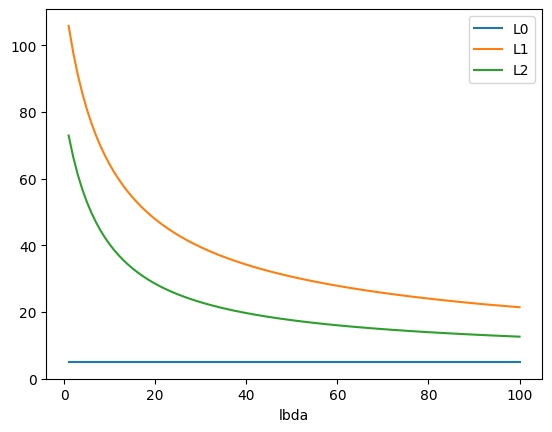

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

f = [5, 1, -2, -5]
X = make_instances(-5,5,50)
labels = make_labels(X, f, 200)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=None)

L0 = []
L1 = []
L2 = []
lbds = np.arange(1, 101, 1)
for i in lbds:
    ridge = Ridge(i)
    poly_features = PolynomialFeatures(degree=5, include_bias=False).fit_transform(X_train)
    ridge.fit(poly_features, y_train)
    w = ridge.coef_.ravel()
    if(i == 1 or i == 100):
        print(f"W(l = {i}) =  {w}")
    L0.append(l0norm(w))
    L1.append(l1norm(w))
    L2.append(l2norm(w))
plt.plot(lbds, L0, label = "L0")
plt.plot(lbds, L1, label = "L1")
plt.plot(lbds, L2, label = "L2")
plt.xlabel("lbda")
plt.legend()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

W(l = 1) =  [-0.65482109 11.51823451 -8.42661889 -0.27273497  0.21313854]
W(l = 100) =  [-0.          0.         -8.22213514  0.23625903  0.2144457 ]


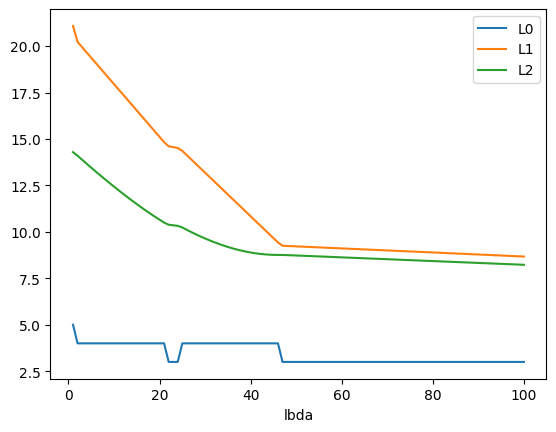

In [51]:
from sklearn.linear_model import Lasso

f = [5, 1, -2, -5]
X = make_instances(-5,5,50)
labels = make_labels(X, f, 200)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=None)

L0 = []
L1 = []
L2 = []
lbds = np.arange(1, 101, 1)
for i in lbds:
    lasso = Lasso(i, tol=1e-6, max_iter=3000)
    poly_features = PolynomialFeatures(degree=5, include_bias=False).fit_transform(X_train)
    lasso.fit(poly_features, y_train)
    w = lasso.coef_.ravel()
    if(i == 1 or i == 100):
        print(f"W(l = {i}) =  {w}")
    L0.append(l0norm(w))
    L1.append(l1norm(w))
    L2.append(l2norm(w))
plt.plot(lbds, L0, label = "L0")
plt.plot(lbds, L1, label = "L1")
plt.plot(lbds, L2, label = "L2")
plt.xlabel("lbda")
plt.legend()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [52]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

c = []
for score in exam_score:
    if(score < 1000):
        c.append([0.9, 0.7, 0.6])
    elif(score > 2000):
        c.append([0.9, 0.7, 0.6])
    else:
        c.append([0.45 + abs(((score - 1500) / 500)) * 0.45, 0.7, 0.6])

#plt.scatter(np.arange(0, n_data_points, 1), exam_score, c = c)

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5


### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

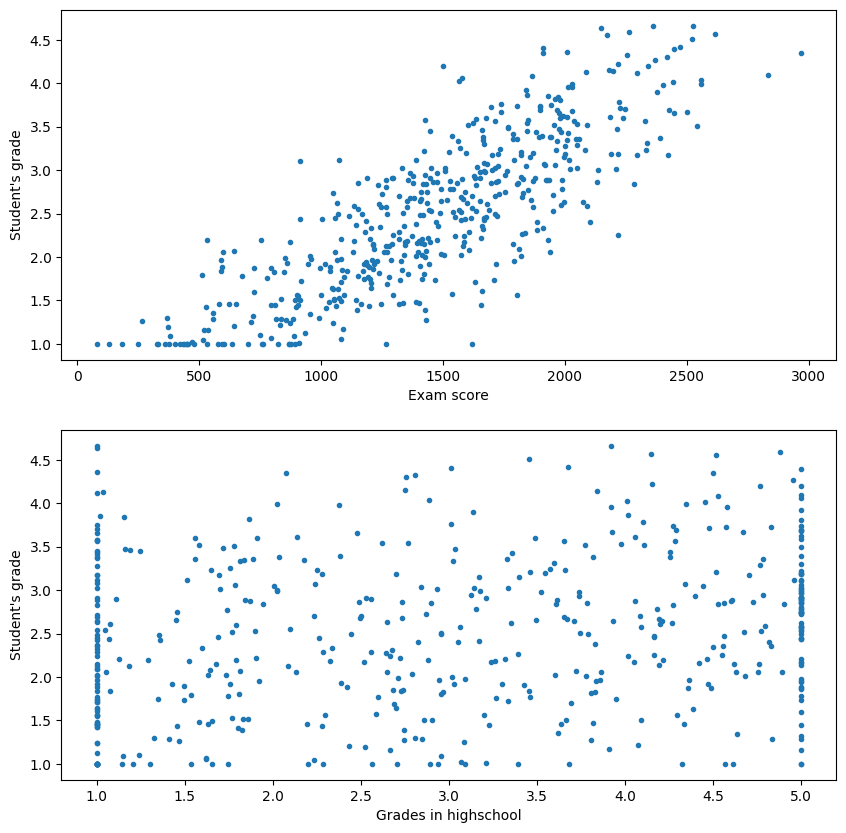

In [53]:
fig, axes = plt.subplots(2 , figsize= (10,10))
axes[0].set_xlabel("Exam score")
axes[0].set_ylabel("Student's grade")
axes[0].plot(exam_score, grades_y, '.')

axes[1].set_xlabel("Grades in highschool")
axes[1].set_ylabel("Student's grade")
axes[1].plot(grade_in_highschool, grades_y, '.')

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

w = [0.1506118  0.00141497 0.09477276]


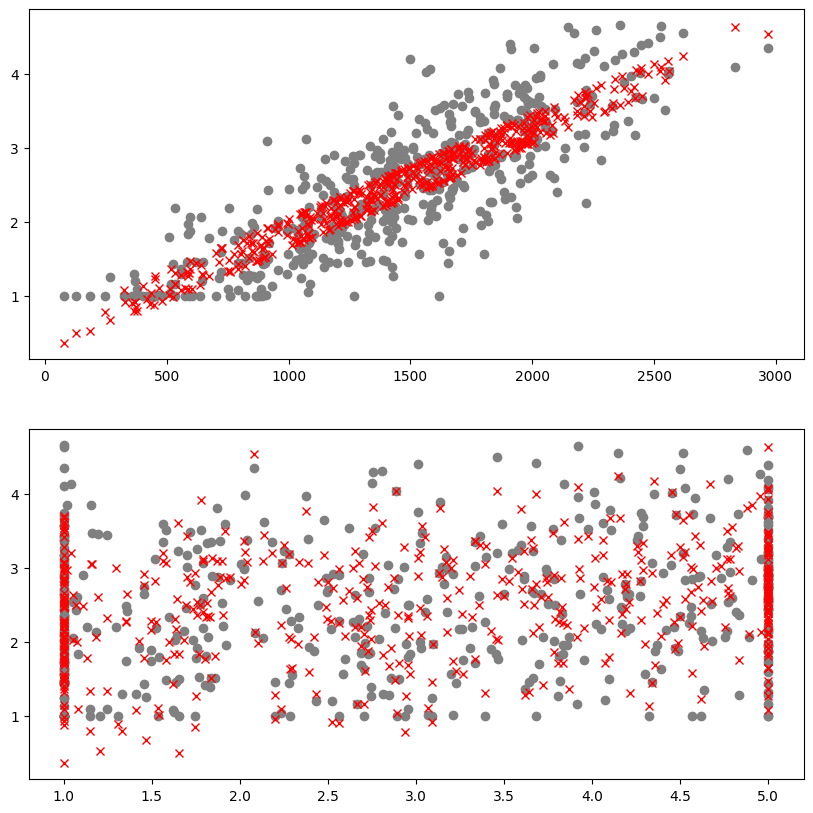

In [54]:
ridge = Ridge(0.01)
ridge.fit(grades_X, grades_y)
w = np.hstack((ridge.intercept_, ridge.coef_))
print(f"w = {w}")

prediction = ridge.predict(grades_X)

fig, axs = plt.subplots(2, figsize = (10, 10))
axs[0].scatter(exam_score, grades_y, color = [0.5, 0.5, 0.5])
axs[0].plot(exam_score, prediction, 'rx')
axs[1].scatter(grade_in_highschool, grades_y, color = [0.5, 0.5, 0.5])
axs[1].plot(grade_in_highschool, prediction, 'rx')

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [55]:
from sklearn.preprocessing import StandardScaler
# class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

ridge = Ridge(0.01)
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(np.reshape(grades_y, (len(grades_y), 1)))
ridge.fit(grades_X_fixed, grades_y_fixed)
w = np.hstack((ridge.intercept_, ridge.coef_.ravel()))
print(f"w = {w}")

prediction = ridge.predict(grades_X_fixed)

feature1 = []
feature2 = []
for row in grades_X_fixed:
    feature1.append(row[0])
    feature2.append(row[1])

w = [8.62551331e-17 8.16303750e-01 1.51677612e-01]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [56]:
arr = []
for row in grades_X_fixed:
    arr.append(row[1])

grades_X_fixed_colinear = np.hstack((grades_X_fixed , np.reshape(arr, (len(arr), 1))))

print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [57]:
ridge = Ridge(0.01)
ridge.fit(grades_X_fixed_colinear, grades_y_fixed)
w = np.hstack((ridge.intercept_, ridge.coef_.ravel()))
print(f"w = {w}")

w = [8.62559710e-17 8.16303637e-01 7.58395686e-02 7.58395686e-02]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [58]:
#ws = np.zeros((3, 10))
wss = []
lbds = [0.01, 1000]
for lbd in lbds:
    ridge = Ridge(lbd)
    print()

    for i in range(0, 10):
        X_train_7b, X_test_7b, y_train_7b, y_test_7b = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5, random_state=None)
        ridge.fit(X_train_7b, y_train_7b)
        w = ridge.coef_.ravel()
        wss.append(w)

        #for j in range(0, len(w)):
        #    ws[j][i] += w[j]

        print(f"w(l = {lbd}) = {w}")
        
    #stdev = np.zeros(3)
    #for i in range(0, 3):
    #    mn = np.mean(ws[i])
    #    for j in range(0, len(ws[i])):
    #        stdev[i] += (ws[i][j] - mn) ** 2
    #stdev = np.sqrt(stdev / 10)

    stdev2 = np.std(wss, axis=0)
    print(f"StdDev = {stdev2}")
    #ws = np.zeros((3, 10))
    wss = []




w(l = 0.01) = [0.79385128 0.06504303 0.06504303]
w(l = 0.01) = [0.80739011 0.0761075  0.0761075 ]
w(l = 0.01) = [0.814158   0.07673386 0.07673386]
w(l = 0.01) = [0.83265053 0.07483515 0.07483515]
w(l = 0.01) = [0.79735626 0.08013669 0.08013669]
w(l = 0.01) = [0.81845427 0.04525193 0.04525193]
w(l = 0.01) = [0.80086373 0.0614553  0.0614553 ]
w(l = 0.01) = [0.81216485 0.06648337 0.06648337]
w(l = 0.01) = [0.81501911 0.04444567 0.04444567]
w(l = 0.01) = [0.81925961 0.07443972 0.07443972]
StdDev = [0.01102672 0.01216945 0.01216945]

w(l = 1000) = [0.16404384 0.02835895 0.02835895]
w(l = 1000) = [0.16558664 0.03291219 0.03291219]
w(l = 1000) = [0.16343683 0.02978618 0.02978618]
w(l = 1000) = [0.16095001 0.02672001 0.02672001]
w(l = 1000) = [0.16355219 0.01854873 0.01854873]
w(l = 1000) = [0.15124127 0.0341431  0.0341431 ]
w(l = 1000) = [0.16897681 0.02581807 0.02581807]
w(l = 1000) = [0.17430696 0.02425615 0.02425615]
w(l = 1000) = [0.15269851 0.03400781 0.03400781]
w(l = 1000) = [0.156452

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.